In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline


In [ ]:
# Set theme to "darkgrid"
sns.set_theme(style="darkgrid")

In [ ]:
dataframe = pd.read_csv("/content/data.csv")

In [ ]:
# rename columns (gender got loaded as genre for some reason)
dataframe.rename(
    columns={
    "Genre": "Gender"
    }, inplace=True)
# set index
# dataframe.set_index("CustomerID", inplace=True)
dataframe.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploratory Data Analysis**

In [ ]:
# describe the dataframe
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataframe.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

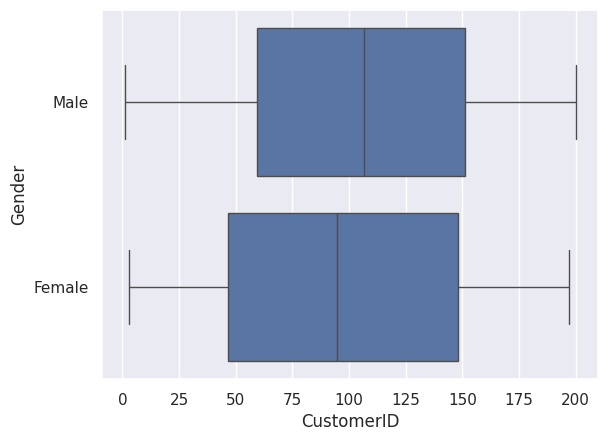

In [ ]:
sns.boxplot(data=dataframe, x="CustomerID", y="Gender")
plt.show()

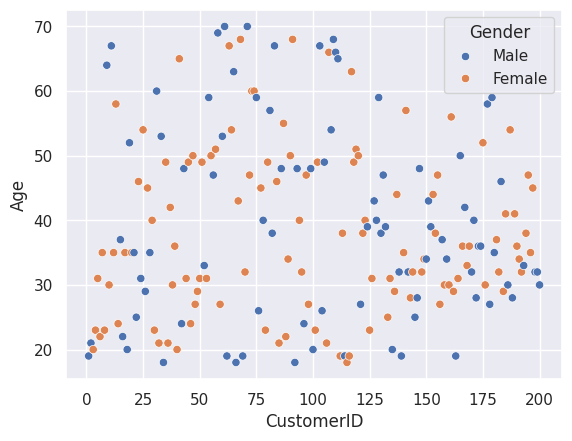

In [ ]:
sns.scatterplot(data=dataframe, x="CustomerID", y="Age", hue="Gender")
plt.show()

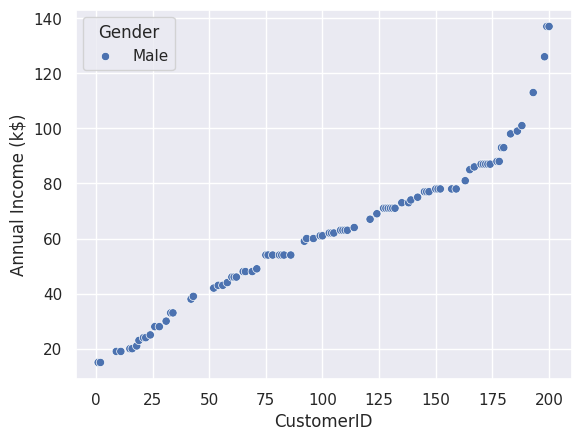

In [ ]:
sns.scatterplot(data=dataframe[dataframe["Gender"] == "Male"], x="CustomerID", y="Annual Income (k$)", hue="Gender")
plt.show()

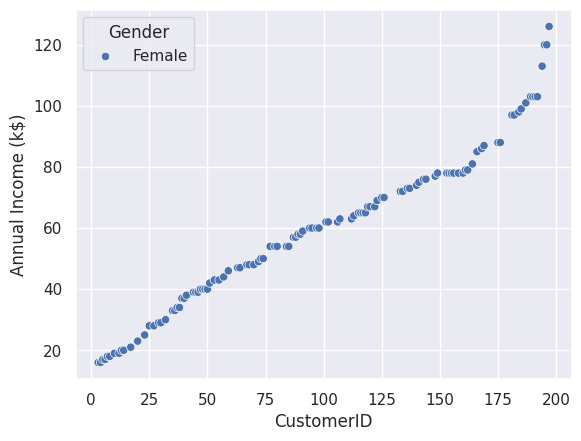

In [ ]:
sns.scatterplot(data=dataframe[dataframe["Gender"] == "Female"],
                x="CustomerID", y="Annual Income (k$)", hue="Gender")
plt.show()

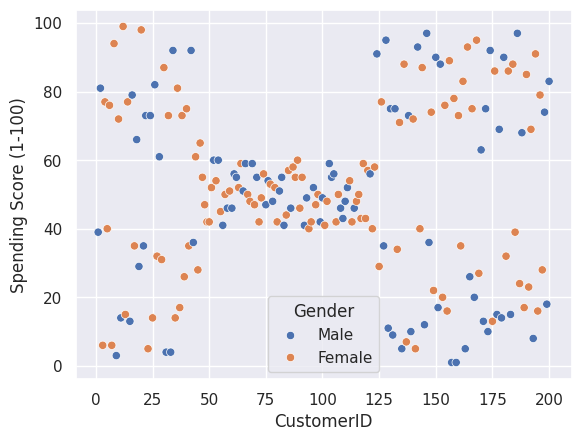

In [ ]:
sns.scatterplot(data=dataframe, x="CustomerID", y="Spending Score (1-100)", hue="Gender")
plt.show()

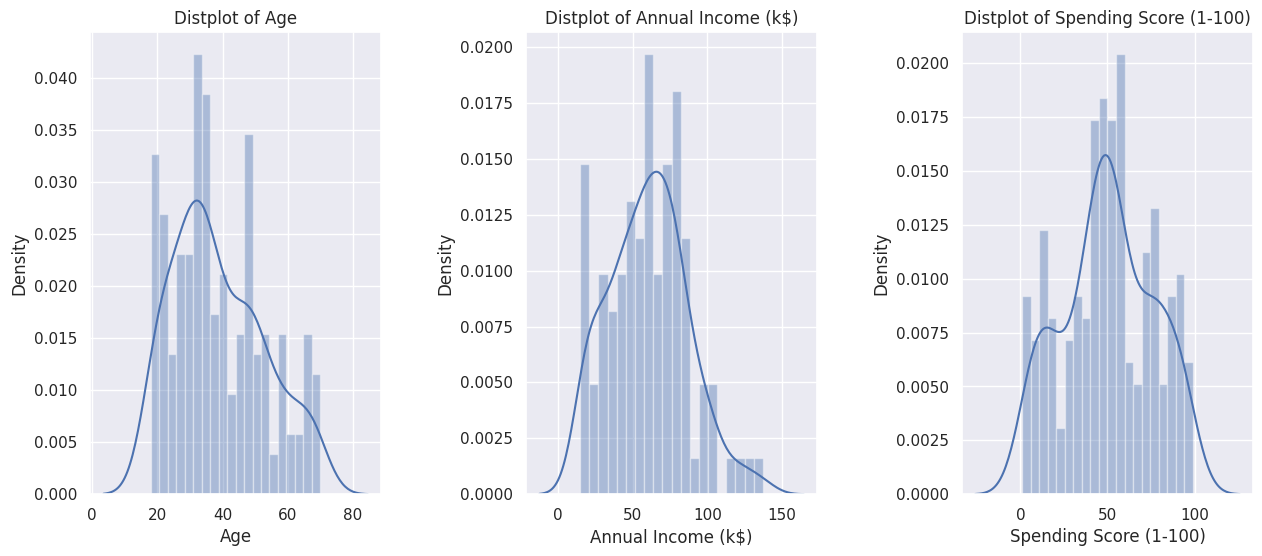

In [ ]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(dataframe[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

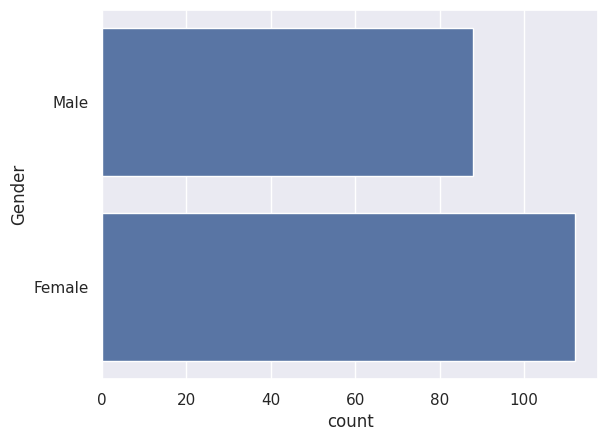

In [ ]:
sns.countplot(data=dataframe, y="Gender")
plt.show()

**Clustering with K-Means**


**Age and Annual Income**


In [ ]:
matrix_X1 = dataframe[["Age", "Annual Income (k$)"]].iloc[:, :].values
iertia = []


In [ ]:
# we find optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(matrix_X1)
    iertia.append(kmeans.inertia_)

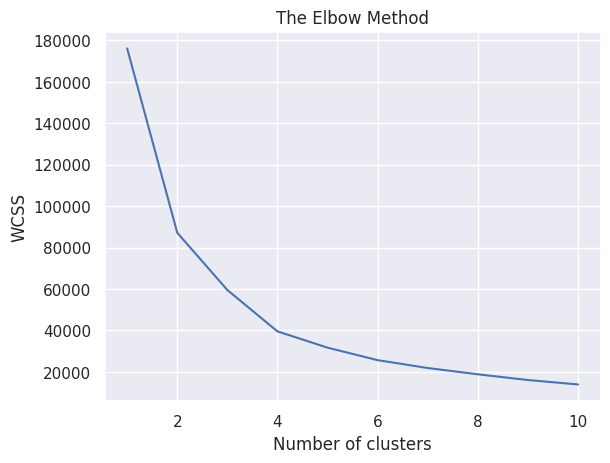

In [ ]:
sns.lineplot(x=range(1,11),y=iertia)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# apply KMeans with the optimal number of clusters found
kmeans = KMeans(n_clusters=5,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=42)
y_kmeans = kmeans.fit_predict(matrix_X1)

**Visualise the Clusters**

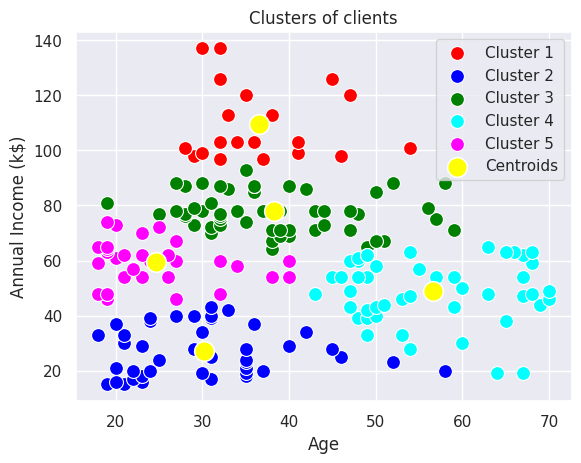

In [ ]:
# Visualising the clusters
sns.scatterplot(
    x=matrix_X1[y_kmeans == 0, 0],
    y=matrix_X1[y_kmeans == 0, 1],
    s=100, c='red',
    label='Cluster 1')

sns.scatterplot(
    x=matrix_X1[y_kmeans == 1, 0],
    y=matrix_X1[y_kmeans == 1, 1],
    s=100, c='blue',
    label='Cluster 2')

sns.scatterplot(
    x=matrix_X1[y_kmeans == 2, 0],
    y=matrix_X1[y_kmeans == 2, 1],
    s=100, c='green',
    label='Cluster 3')

sns.scatterplot(
    x=matrix_X1[y_kmeans == 3, 0],
    y=matrix_X1[y_kmeans == 3, 1],
    s=100, c='cyan',
    label='Cluster 4')

sns.scatterplot(
    x=matrix_X1[y_kmeans == 4, 0],
    y=matrix_X1[y_kmeans == 4, 1],
    s=100, c='magenta',
    label='Cluster 5')

sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    s=200, c='yellow',
    label='Centroids')

plt.title('Clusters of clients')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


**Age and Spending Score**


In [ ]:
matrix_X2 = dataframe[["Age", "Spending Score (1-100)"]].iloc[:, :].values
iertia = []

In [ ]:
# we find optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(matrix_X2)
    iertia.append(kmeans.inertia_)

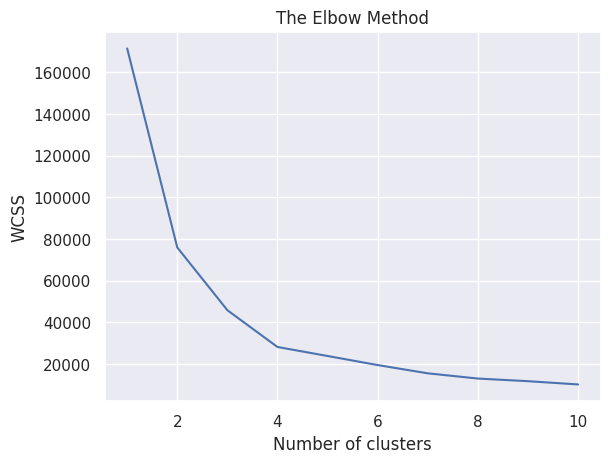

In [ ]:
sns.lineplot(x=range(1, 11), y=iertia)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# apply KMeans with the optimal number of clusters found
kmeans = KMeans(n_clusters=5,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=42)
y_kmeans = kmeans.fit_predict(matrix_X2)

**visualize the clusters**

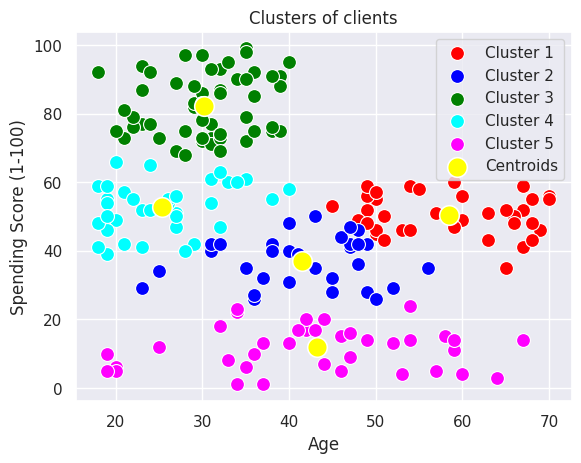

In [ ]:
# Visualising the clusters
sns.scatterplot(
    x=matrix_X2[y_kmeans == 0, 0],
    y=matrix_X2[y_kmeans == 0, 1],
    s=100, c='red',
    label='Cluster 1')

sns.scatterplot(
    x=matrix_X2[y_kmeans == 1, 0],
    y=matrix_X2[y_kmeans == 1, 1],
    s=100, c='blue',
    label='Cluster 2')

sns.scatterplot(
    x=matrix_X2[y_kmeans == 2, 0],
    y=matrix_X2[y_kmeans == 2, 1],
    s=100, c='green',
    label='Cluster 3')

sns.scatterplot(
    x=matrix_X2[y_kmeans == 3, 0],
    y=matrix_X2[y_kmeans == 3, 1],
    s=100, c='cyan',
    label='Cluster 4')

sns.scatterplot(
    x=matrix_X2[y_kmeans == 4, 0],
    y=matrix_X2[y_kmeans == 4, 1],
    s=100, c='magenta',
    label='Cluster 5')

sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    s=200, c='yellow',
    label='Centroids')

plt.title('Clusters of clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Annual Income and Spending Score**

In [ ]:
matrix_X3 = dataframe[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
iertia = []


In [ ]:
# we find optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(matrix_X3)
    iertia.append(kmeans.inertia_)

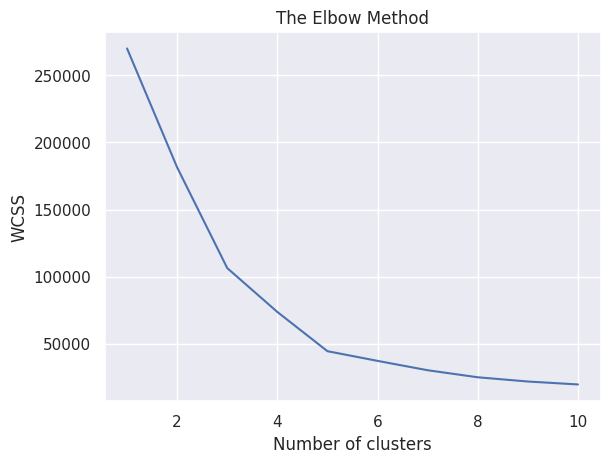

In [ ]:
sns.lineplot(x=range(1, 11), y=iertia)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# apply KMeans with the optimal number of clusters found
kmeans = KMeans(n_clusters=5,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=42)
y_kmeans = kmeans.fit_predict(matrix_X3)

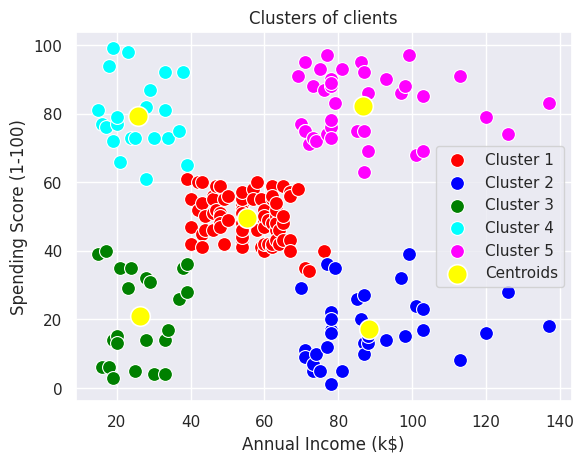

In [ ]:
# Visualising the clusters
sns.scatterplot(
    x=matrix_X3[y_kmeans == 0, 0],
    y=matrix_X3[y_kmeans == 0, 1],
    s=100, c='red',
    label='Cluster 1')

sns.scatterplot(
    x=matrix_X3[y_kmeans == 1, 0],
    y=matrix_X3[y_kmeans == 1, 1],
    s=100, c='blue',
    label='Cluster 2')

sns.scatterplot(
    x=matrix_X3[y_kmeans == 2, 0],
    y=matrix_X3[y_kmeans == 2, 1],
    s=100, c='green',
    label='Cluster 3')

sns.scatterplot(
    x=matrix_X3[y_kmeans == 3, 0],
    y=matrix_X3[y_kmeans == 3, 1],
    s=100, c='cyan',
    label='Cluster 4')

sns.scatterplot(
    x=matrix_X3[y_kmeans == 4, 0],
    y=matrix_X3[y_kmeans == 4, 1],
    s=100, c='magenta',
    label='Cluster 5')

sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    s=200, c='yellow',
    label='Centroids')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


**Advanced Section**

In [ ]:
import plotly.graph_objects as go


In [ ]:
matrix_X4 = dataframe[
    ["Age",
     "Annual Income (k$)",
     "Spending Score (1-100)"]].iloc[:, :].values
iertia = []

In [ ]:
# we find optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(matrix_X4)
    iertia.append(kmeans.inertia_)


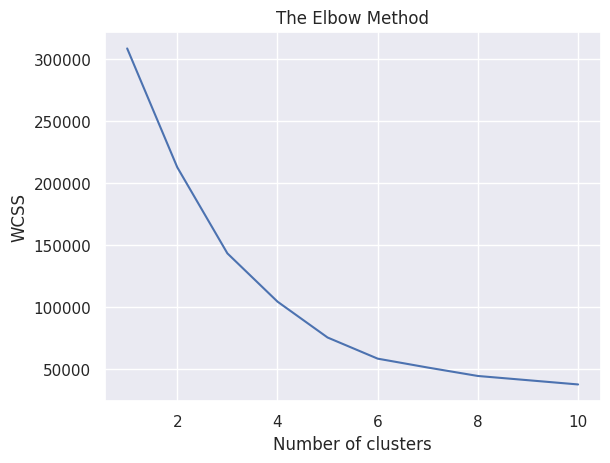

In [ ]:
sns.lineplot(x=range(1, 11), y=iertia)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

In [ ]:
dataframe['label3'] = labels3
trace1 = go.Scatter3d(
    x = dataframe['Age'],
    y = dataframe['Annual Income (k$)'],
    z = dataframe['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        color=dataframe['label3'],
        size=20,
        line=dict(
            color=dataframe['label3'],
            width=12
        ),
        opacity=0.70
    )
)
data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        zaxis=dict(title='Spending Score'),
        yaxis=dict(title='Annual Income')
    ),
    height=600,
    width=600
)
fig = go.Figure(data=data, layout=layout)
fig.show()